In [187]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from tqdm import tqdm
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

#### EDA

In [152]:
df = pd.read_csv('/Users/samholt/GA/DSI12-lessons/projects/Capstone_Project/MH_News_Processsed_Data.csv\'', sep = ",")

In [153]:
# set index to date and  datetime format 
df["date"] = [dt.datetime.strptime(i, '%Y-%m-%d') for i in df["date"]]
df.set_index(df["date"], inplace= True)
df.drop(labels= "date", axis= 1, inplace= True)
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2019-08-22', '2019-08-23', '2019-08-24', '2019-08-25',
               '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
               '2019-08-30', '2019-08-31'],
              dtype='datetime64[ns]', name='date', length=3103, freq=None)

In [119]:
df.dtypes

Anxiety         float64
SuicideWatch    float64
bipolar         float64
depression      float64
news            float64
                 ...   
improve_ct        int64
olympics_ct       int64
football_ct       int64
qualify_ct        int64
date             object
Length: 166, dtype: object

#### Vizualise & Stationarise the Time Series
* Considering two potential options, all mental health or just anxiety, hypothesis is that anxiety may have a more direct link with negative news topics

In [193]:
# create dataset for each 
df_mh = df.drop(labels = ['Anxiety', 'SuicideWatch', 'bipolar', 'depression'], axis= 1)
df_anx = df.drop(labels = ['Total_MH', 'SuicideWatch', 'bipolar', 'depression'], axis= 1)
df_dep = df.drop(labels = ['Total_MH', 'SuicideWatch', 'bipolar', 'Anxiety'], axis= 1)

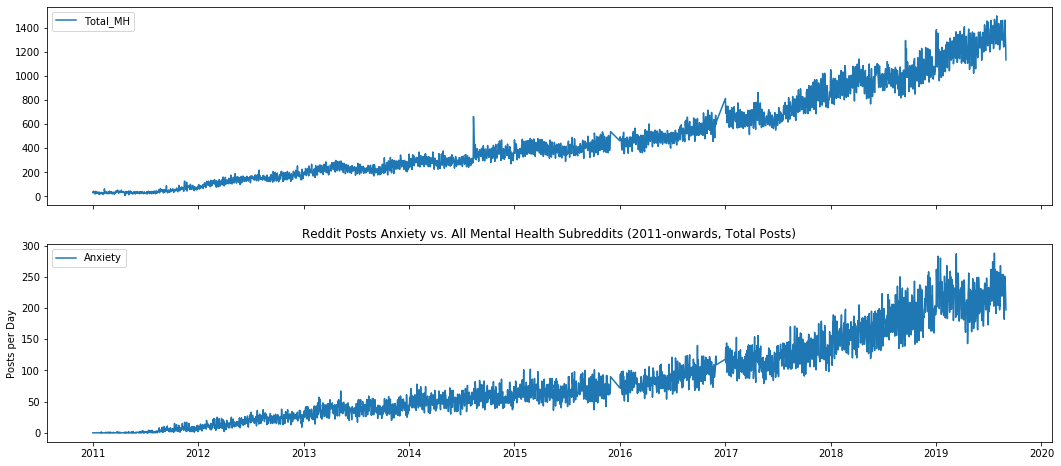

In [159]:
# visualize posts over time- we see an overall upward trend for the data but difficult to assess seasonality
f, (ax1, ax2) = plt.subplots(2,1, figsize = (18,8), sharex= True, )
sns.lineplot(data= df[["Total_MH"]], ax= ax1)
sns.lineplot(data= df[["Anxiety"]], ax= ax2, )
plt.title("Reddit Posts Anxiety vs. All Mental Health Subreddits (2011-onwards, Total Posts)")
plt.xlabel("")
plt.ylabel("Posts per Day")
plt.show()

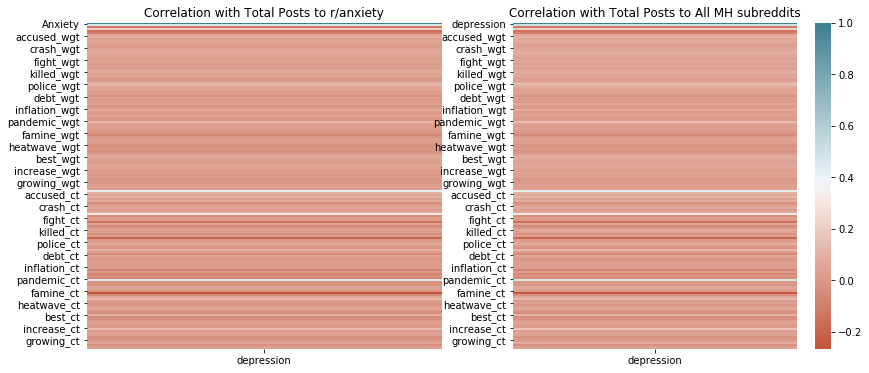

In [194]:
# correlation between the two potential targets looks similar, if we include all we have a greater sample so will use total MH going forwards
f, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6), sharex= True)

sns.heatmap(df_anx.corr()[["Anxiety"]],cmap=sns.diverging_palette(20, 220, n=200), cbar= False, ax=ax1).set_title("Correlation with Total Posts to r/anxiety")
sns.heatmap(df_dep.corr()[["depression"]],cmap=sns.diverging_palette(20, 220, n=200), ax = ax2).set_title("Correlation with Total Posts to All MH subreddits")

plt.show()

In [ ]:
# use Dickey-Fuller test to assess whether data is stationary

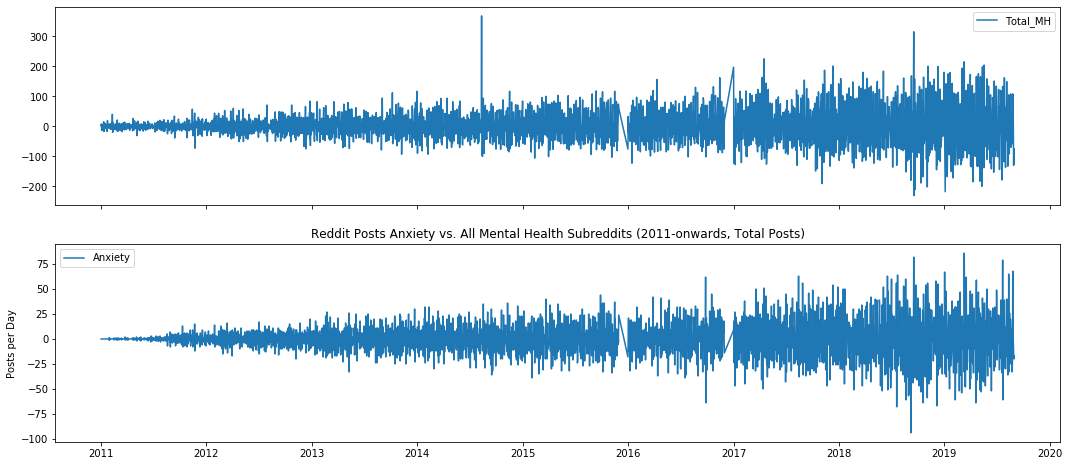

In [188]:
# we should difference the data in order to account for the long term upwards trend 
f, (ax1, ax2) = plt.subplots(2,1, figsize = (18,8), sharex= True, )
sns.lineplot(data= df[["Total_MH"]].diff(), ax= ax1)
sns.lineplot(data= df[["Anxiety"]].diff(), ax= ax2, )
plt.title("Reddit Posts Anxiety vs. All Mental Health Subreddits (2011-onwards, Total Posts)")
plt.xlabel("")
plt.ylabel("Posts per Day")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput 

In [186]:
# visualize posts over time with 7 day rolling (weekly data)

sm.seasonal_decompose(df.Total_MH)

f, (ax1, ax2) = plt.subplots(2,1, figsize = (18,8), sharex= True, )
sns.lineplot(data= df[["Total_MH"]].rolling(7).sum(), ax= ax1)
sns.lineplot(data= df[["Anxiety"]].rolling(7).sum(), ax= ax2, )
plt.title("Reddit Posts Anxiety vs. All Mental Health Subreddits (2011-onwards, Total Posts)")
plt.xlabel("")
plt.ylabel("Posts per Day")
plt.show()

AttributeError: module 'statsmodels.api' has no attribute 'seasonal_decompose'

In [85]:
df.head()

,Anxiety,SuicideWatch,bipolar,depression,news,Total_MH,vader_compound,vader_neg,vader_neu,vader_pos,...,growth_ct,awarded_ct,champion_ct,record_ct,cure_ct,growing_ct,improve_ct,olympics_ct,football_ct,qualify_ct
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0.0,16.0,0.0,17.0,82.0,33.0,0.188214,0.134174,0.707789,0.158041,...,0,0,0,0,0,0,0,0,0,0
2011-01-02,0.0,18.0,0.0,17.0,90.0,35.0,0.213299,0.039529,0.800826,0.159658,...,1,0,0,0,0,0,0,0,0,0
2011-01-03,0.0,23.0,0.0,20.0,172.0,43.0,-0.281094,0.188880,0.765657,0.045447,...,0,0,0,0,1,0,0,0,0,0
2011-01-04,0.0,13.0,0.0,16.0,153.0,29.0,-0.201356,0.108074,0.869392,0.022559,...,0,0,0,0,0,1,0,0,1,0
2011-01-05,0.0,20.0,0.0,13.0,176.0,33.0,-0.294761,0.206899,0.746196,0.046906,...,0,1,0,0,0,0,0,0,0,0


In [86]:
df.tail()

,Anxiety,SuicideWatch,bipolar,depression,news,Total_MH,vader_compound,vader_neg,vader_neu,vader_pos,...,growth_ct,awarded_ct,champion_ct,record_ct,cure_ct,growing_ct,improve_ct,olympics_ct,football_ct,qualify_ct
date,,,,,,,,,,,,,,,,,,,,,
2019-08-27,251.0,381.0,110.0,714.0,1377.0,1456.0,-0.524220,0.287250,0.657680,0.055070,...,1,0,0,0,0,0,1,0,0,0
2019-08-28,248.0,369.0,117.0,729.0,1381.0,1463.0,-0.305496,0.170377,0.820615,0.008994,...,1,0,0,1,1,0,1,1,3,0
2019-08-29,234.0,326.0,128.0,645.0,1253.0,1333.0,-0.538780,0.252530,0.707768,0.039456,...,0,0,0,4,0,0,2,0,0,1
2019-08-30,214.0,282.0,130.0,633.0,1375.0,1259.0,-0.504891,0.229768,0.761921,0.008324,...,7,0,1,2,0,2,2,0,1,0
2019-08-31,197.0,253.0,127.0,556.0,1068.0,1133.0,0.117473,0.105515,0.706370,0.188334,...,1,0,0,0,0,0,0,0,0,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3103 entries, 2011-01-01 to 2019-08-31
Columns: 165 entries, Anxiety to qualify_ct
dtypes: float64(88), int64(77)
memory usage: 3.9+ MB


In [88]:
# removing "counts from column titles"
df_anx.columns = [i.replace("_count", "") for i in df_anx.columns]
df_mh.columns = [i.replace("_count", "") for i in df_mh.columns]

In [89]:
df.describe()

,Anxiety,SuicideWatch,bipolar,depression,news,Total_MH,vader_compound,vader_neg,vader_neu,vader_pos,...,growth_ct,awarded_ct,champion_ct,record_ct,cure_ct,growing_ct,improve_ct,olympics_ct,football_ct,qualify_ct
count,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,...,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000
mean,82.173381,100.485981,43.888495,257.150822,1245.638092,483.698679,-0.215921,0.158003,0.783183,0.058816,...,2.295843,0.305511,0.216887,1.965840,0.437963,0.845956,0.827586,0.475024,1.084112,0.055108
std,67.247718,76.716912,39.369169,190.029560,772.901993,368.117345,0.166080,0.062964,0.065554,0.037649,...,2.057241,0.592337,0.488103,1.910166,0.757470,1.086872,1.077996,0.753632,1.283362,0.240605
min,0.000000,3.000000,0.000000,3.000000,51.000000,6.000000,-0.763480,0.017837,0.462011,0.001112,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,46.000000,13.000000,105.500000,496.500000,198.000000,-0.326997,0.113326,0.743566,0.031804,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,78.000000,31.000000,208.000000,1253.000000,384.000000,-0.216771,0.151366,0.787562,0.052074,...,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,122.000000,128.000000,66.000000,393.000000,1805.000000,709.000000,-0.110457,0.194204,0.826432,0.076831,...,3.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
max,288.000000,382.000000,171.000000,801.000000,3219.000000,1498.000000,0.436106,0.530816,0.966572,0.354302,...,12.000000,4.000000,4.000000,12.000000,5.000000,7.000000,8.000000,5.000000,11.000000,2.000000


In [190]:
df_anx[['vader_compound', 'vader_neg', 'vader_neu','vader_pos',"Anxiety"]].corr()[["Anxiety"]]

,Anxiety
vader_compound,-0.111982
vader_neg,0.203415
vader_neu,-0.142048
vader_pos,-0.092954
Anxiety,1.000000


In [191]:
df_mh[['vader_compound', 'vader_neg', 'vader_neu','vader_pos',"Total_MH"]].corr()[["Total_MH"]]

,Total_MH
vader_compound,-0.113481
vader_neg,0.205517
vader_neu,-0.144818
vader_pos,-0.091645
Total_MH,1.000000


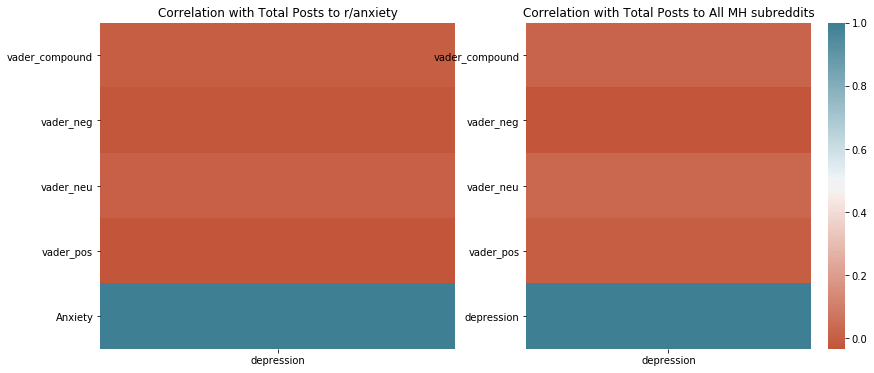

In [198]:
#understand correlation 
f, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6), sharex= True)

sns.heatmap(df_anx[['vader_compound', 'vader_neg', 'vader_neu','vader_pos',"Anxiety"]].diff().corr()[["Anxiety"]],cmap=sns.diverging_palette(20, 220, n=200), cbar= False, ax=ax1).set_title("Correlation with Total Posts to r/anxiety")
sns.heatmap(df_dep[['vader_compound', 'vader_neg', 'vader_neu','vader_pos',"depression"]].diff().corr()[["depression"]],cmap=sns.diverging_palette(20, 220, n=200), ax = ax2).set_title("Correlation with Total Posts to All MH subreddits")

plt.show()

In [200]:
df_dep.corr()[["depression"]]

,depression
depression,1.000000
news,0.499200
vader_compound,-0.111201
vader_neg,0.203506
vader_neu,-0.143072
...,...
growing_ct,-0.011030
improve_ct,0.016915
olympics_ct,0.079951
football_ct,-0.019921


In [201]:
df_mh.corr()[["Total_MH"]]

,Total_MH
news,0.467508
Total_MH,1.000000
vader_compound,-0.113481
vader_neg,0.205517
vader_neu,-0.144818
...,...
growing_ct,-0.019913
improve_ct,0.008528
olympics_ct,0.067616
football_ct,-0.028545


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

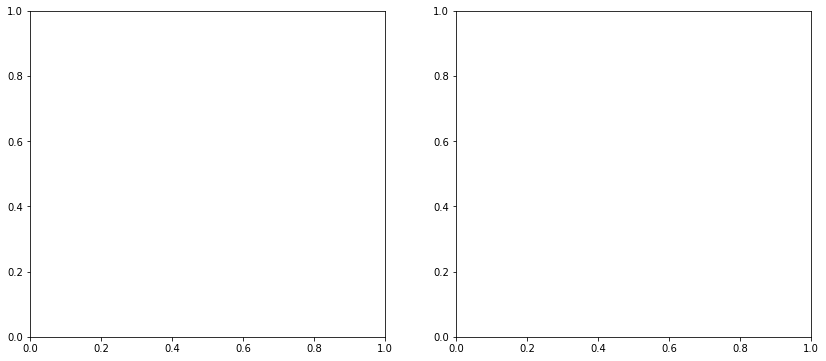

In [184]:
#understand correlation 
f, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6), sharex= True)

sns.heatmap(df_anx[['vader_compound', 'vader_neg', 'vader_neu','vader_pos',"Anxiety"]].resample("W").sum().diff().corr()[["Anxiety"]],cmap=sns.diverging_palette(20, 220, n=200), cbar= False, ax=ax1).set_title("Correlation with Total Posts to r/anxiety")
sns.heatmap(df_mh[['vader_compound', 'vader_neg', 'vader_neu','vader_pos',"Total_MH"]].resample("W").sum().diff().corr()[["Total_MH"]],cmap=sns.diverging_palette(20, 220, n=200), ax = ax2).set_title("Correlation with Total Posts to All MH subreddits")

plt.show()

In [169]:
df[["Anxiety"]].rolling(7).sum()

,Anxiety
date,
2011-01-01,NaN
2011-01-02,NaN
2011-01-03,NaN
2011-01-04,NaN
2011-01-05,NaN
...,...
2019-08-27,1619.0
2019-08-28,1613.0
2019-08-29,1604.0
